In [1]:
!nvidia-smi

Thu Jul 18 00:17:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:01:00.0 Off |                  Off |
| 50%   75C    P2             261W / 300W |  33171MiB / 49140MiB |     77%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Load INLP results

In [2]:
# File paths
crows_results_dir = '../results/crows_INLP'
stereoset_results_dir = '../results/stereoset_INLP_processed'

before_debias_crows_results_dir = '../results/crows'
before_debias_stereoset_results_dir = '../results/stereoset_processed'

In [3]:
import os
import json


def load_stereoset_results(base_dir):
    results = {
        'llama2': {},
        'gpt2': {},
        'phi2': {}
    }
    
    for n_classifiers in ['10', '80']:
        dir_path = os.path.join(base_dir, f'n_classifiers_{n_classifiers}')
        for file in os.listdir(dir_path):
            if file.endswith('.json'):
                file_path = os.path.join(dir_path, file)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                
                model_key = ''
                if 'INLPGPT2LMHeadModel' in file:
                    model_key = 'gpt2'
                elif 'INLPLlama2LMHeadModel' in file:
                    model_key = 'llama2'
                elif 'INLPPhi2LMHeadModel' in file:
                    model_key = 'phi2'
                
                category = 'gender' if 'gender' in file else 'race' if 'race-color' in file else 'religion'
                
                if model_key:
                    if n_classifiers not in results[model_key]:
                        results[model_key][n_classifiers] = {}
                    results[model_key][n_classifiers][category] = data[list(data.keys())[0]]['intrasentence'][category]

    return results

stereoset_results_dir = '../results/stereoset_INLP_processed'
stereoset_results = load_stereoset_results(stereoset_results_dir)

stereoset_results_10 = {
    model: data['10'] for model, data in stereoset_results.items() if '10' in data
}
stereoset_results_80 = {
    model: data['80'] for model, data in stereoset_results.items() if '80' in data
}

In [4]:
# Print the results to verify
print("StereoSet Results for 10 classifiers:")
print(json.dumps(stereoset_results_10, indent=2))

StereoSet Results for 10 classifiers:
{
  "llama2": {
    "race": {
      "Count": 8928.0,
      "LM Score": 88.89561556256788,
      "SS Score": 64.10935090607965,
      "ICAT Score": 63.81042688288337
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 91.87569098117855,
      "SS Score": 59.49479552248061,
      "ICAT Score": 74.42887299412043
    },
    "gender": {
      "Count": 2313.0,
      "LM Score": 88.71247482319447,
      "SS Score": 64.54108723841358,
      "ICAT Score": 62.91295811240169
    }
  },
  "gpt2": {
    "race": {
      "Count": 8928.0,
      "LM Score": 90.93510743451017,
      "SS Score": 59.025673124786486,
      "ICAT Score": 74.52009632908556
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 91.57640179300049,
      "SS Score": 63.151867564177536,
      "ICAT Score": 67.48838762529142
    },
    "gender": {
      "Count": 2313.0,
      "LM Score": 91.31736033137832,
      "SS Score": 60.04622037595552,
      "ICAT Score": 72.9694

In [5]:
print("\nStereoSet Results for 80 classifiers:")
print(json.dumps(stereoset_results_80, indent=2))


StereoSet Results for 80 classifiers:
{
  "llama2": {
    "race": {
      "Count": 8928.0,
      "LM Score": 88.62828791436685,
      "SS Score": 63.758154772696386,
      "ICAT Score": 64.24105386706773
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 91.04997274568404,
      "SS Score": 61.35367273978076,
      "ICAT Score": 70.37494087527496
    },
    "gender": {
      "Count": 2313.0,
      "LM Score": 90.30387616390865,
      "SS Score": 66.27833024232326,
      "ICAT Score": 60.903949796749274
    }
  },
  "gpt2": {
    "race": {
      "Count": 8928.0,
      "LM Score": 89.9729184395735,
      "SS Score": 55.63403916507874,
      "ICAT Score": 79.83469951387366
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 89.30950273491368,
      "SS Score": 63.1171063472386,
      "ICAT Score": 65.8798578310565
    },
    "gender": {
      "Count": 2313.0,
      "LM Score": 80.84728307813016,
      "SS Score": 58.83441693146839,
      "ICAT Score": 66.562510

In [6]:
import os
import json

import os
import json

def load_crows_results(base_dir):
    results = {
        'llama2': {},
        'gpt2': {},
        'phi2': {}
    }
    
    for n_classifiers in ['10', '80']:
        dir_path = os.path.join(base_dir, f'n_classifiers_{n_classifiers}')
        for file in os.listdir(dir_path):
            if file.endswith('.json'):
                file_path = os.path.join(dir_path, file)
                with open(file_path, 'r') as f:
                    loaded = json.load(f)
                
                model_key = ''
                if 'INLPLlama2' in file:
                    model_key = 'llama2'
                elif 'INLPGPT2' in file:
                    model_key = 'gpt2'
                elif 'INLPPhi2' in file:
                    model_key = 'phi2'
                
                category = 'gender' if 'gender' in file else 'race-color' if 'race-color' in file else 'religion'
                
                if model_key:
                    if n_classifiers not in results[model_key]:
                        results[model_key][n_classifiers] = {}
                    # Flatten the nested category structure
                    results[model_key][n_classifiers][category] = loaded[category]

    return results

# Usage
crows_results_dir = '../results/crows_INLP'
crows_results = load_crows_results(crows_results_dir)

# Now you can access the results like this:
crows_results_10 = {
    model: data['10'] for model, data in crows_results.items() if '10' in data
}
crows_results_80 = {
    model: data['80'] for model, data in crows_results.items() if '80' in data
}

In [7]:
# Print the results to verify
print("CrowS-Pairs Results for 10 classifiers:")
print(json.dumps(crows_results_10, indent=2))

CrowS-Pairs Results for 10 classifiers:
{
  "llama2": {
    "race-color": {
      "Anti-stereotype score": 34.88,
      "Metric score": 69.19,
      "Num. neutral": 0.0,
      "Stereotype score": 72.3,
      "Total examples": 516
    },
    "gender": {
      "Anti-stereotype score": 59.22,
      "Metric score": 62.21,
      "Num. neutral": 0.0,
      "Stereotype score": 64.15,
      "Total examples": 262
    },
    "religion": {
      "Anti-stereotype score": 33.33,
      "Metric score": 77.14,
      "Num. neutral": 0.0,
      "Stereotype score": 79.8,
      "Total examples": 105
    }
  },
  "gpt2": {
    "religion": {
      "Anti-stereotype score": 66.67,
      "Metric score": 62.86,
      "Num. neutral": 0.0,
      "Stereotype score": 62.63,
      "Total examples": 105
    },
    "race-color": {
      "Anti-stereotype score": 62.79,
      "Metric score": 59.5,
      "Num. neutral": 0.0,
      "Stereotype score": 59.2,
      "Total examples": 516
    },
    "gender": {
      "Anti-st

In [8]:
print("\nCrowS-Pairs Results for 80 classifiers:")
print(json.dumps(crows_results_80, indent=2))


CrowS-Pairs Results for 80 classifiers:
{
  "llama2": {
    "race-color": {
      "Anti-stereotype score": 41.86,
      "Metric score": 68.99,
      "Num. neutral": 0.0,
      "Stereotype score": 71.46,
      "Total examples": 516
    },
    "gender": {
      "Anti-stereotype score": 52.43,
      "Metric score": 64.5,
      "Num. neutral": 0.0,
      "Stereotype score": 72.33,
      "Total examples": 262
    },
    "religion": {
      "Anti-stereotype score": 33.33,
      "Metric score": 80.0,
      "Num. neutral": 0.0,
      "Stereotype score": 82.83,
      "Total examples": 105
    }
  },
  "gpt2": {
    "religion": {
      "Anti-stereotype score": 66.67,
      "Metric score": 60.0,
      "Num. neutral": 0.0,
      "Stereotype score": 59.6,
      "Total examples": 105
    },
    "race-color": {
      "Anti-stereotype score": 51.16,
      "Metric score": 57.95,
      "Num. neutral": 0.0,
      "Stereotype score": 58.56,
      "Total examples": 516
    },
    "gender": {
      "Anti-s

# Load original results

In [9]:
# Load original results
# Crows
with open(f'{before_debias_crows_results_dir}/crows_m-GPT2LMHeadModel_c-gpt2.json', 'r') as f:
    gpt2_before_crows_results = json.load(f)
with open(f'{before_debias_crows_results_dir}/crows_m-PhiForCausalLM_c-microsoft_phi-2.json', 'r') as f:
    phi2_before_crows_results = json.load(f)
with open(f'{before_debias_crows_results_dir}/crows_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf.json', 'r') as f:
    llama2_before_crows_results = json.load(f)
    
# Combine into 1 dict
before_crows_results = {'gpt2': gpt2_before_crows_results,
                        'phi2': phi2_before_crows_results,
                        'llama2': llama2_before_crows_results}
    
# Stereoset
with open(f'{before_debias_stereoset_results_dir}/stereoset_m-GPT2LMHeadModel_c-gpt2_s-42.json', 'r') as f:
    gpt2_before_stereoset_results = json.load(f)
with open(f'{before_debias_stereoset_results_dir}/stereoset_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf_s-42.json', 'r') as f:
    llama2_before_stereoset_results = json.load(f)
with open(f'{before_debias_stereoset_results_dir}/stereoset_m-PhiForCausalLM_c-microsoft_phi-2_s-42.json', 'r') as f:
    phi2_before_stereoset_results = json.load(f)
    
# Combine into 1 dict
before_stereoset_results = {'gpt2': gpt2_before_stereoset_results[list(gpt2_before_stereoset_results.keys())[0]]['intrasentence'],
                            'phi2': phi2_before_stereoset_results[list(phi2_before_stereoset_results.keys())[0]]['intrasentence'],
                            'llama2': llama2_before_stereoset_results[list(llama2_before_stereoset_results.keys())[0]]['intrasentence']}

def filter_categories(data, categories):
    return {
        model: {
            category: values
            for category, values in model_data.items()
            if category in categories
        }
        for model, model_data in data.items()
    }
# Filter the dictionary
before_stereoset_results = filter_categories(before_stereoset_results, ['gender', 'race', 'religion'])
before_crows_results = filter_categories(before_crows_results, ['gender', 'race-color', 'religion'])

In [10]:
print("StereoSet Results (Original) :")
print(json.dumps(before_stereoset_results, indent=2))

StereoSet Results (Original) :
{
  "gpt2": {
    "gender": {
      "Count": 2313.0,
      "LM Score": 91.90575853431928,
      "SS Score": 61.87616432191645,
      "ICAT Score": 70.07600072464027
    },
    "race": {
      "Count": 8928.0,
      "LM Score": 90.90172918499442,
      "SS Score": 57.888534652230234,
      "ICAT Score": 76.56010037252489
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 91.55720056412184,
      "SS Score": 64.4699417502532,
      "ICAT Score": 65.06065338453999
    }
  },
  "phi2": {
    "gender": {
      "Count": 2313.0,
      "LM Score": 91.73856870589753,
      "SS Score": 69.12496210547187,
      "ICAT Score": 56.648635703687184
    },
    "race": {
      "Count": 8928.0,
      "LM Score": 92.36795299729373,
      "SS Score": 61.584454899254034,
      "ICAT Score": 70.96730528462241
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 92.10401461513808,
      "SS Score": 69.24919368066074,
      "ICAT Score": 56.6454542932740

In [11]:
print("CrowS-Pairs Results (Original) :")
print(json.dumps(before_crows_results, indent=2))

CrowS-Pairs Results (Original) :
{
  "gpt2": {
    "gender": {
      "Anti-stereotype score": 58.25,
      "Metric score": 54.96,
      "Num. neutral": 0.0,
      "Stereotype score": 52.83,
      "Total examples": 262
    },
    "race-color": {
      "Anti-stereotype score": 60.47,
      "Metric score": 57.95,
      "Num. neutral": 0.19,
      "Stereotype score": 57.84,
      "Total examples": 516
    },
    "religion": {
      "Anti-stereotype score": 66.67,
      "Metric score": 63.81,
      "Num. neutral": 0.0,
      "Stereotype score": 63.64,
      "Total examples": 105
    }
  },
  "phi2": {
    "gender": {
      "Anti-stereotype score": 50.49,
      "Metric score": 61.07,
      "Num. neutral": 0.0,
      "Stereotype score": 67.92,
      "Total examples": 262
    },
    "race-color": {
      "Anti-stereotype score": 58.14,
      "Metric score": 61.43,
      "Num. neutral": 0.0,
      "Stereotype score": 61.73,
      "Total examples": 516
    },
    "religion": {
      "Anti-stereo

# Plot charts visualization

# Stereoset scores

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_chart(model_name, data_original, data_10, data_80):
    categories = ['gender', 'race', 'religion']
    original_scores = [data_original[model_name][cat]['SS Score'] for cat in categories]
    debias_10_scores = [data_10[model_name][cat]['SS Score'] for cat in categories]
    debias_80_scores = [data_80[model_name][cat]['SS Score'] for cat in categories]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width, original_scores, width, label='Original', color='#8884d8')
    rects2 = ax.bar(x, debias_10_scores, width, label='Debias 10', color='#82ca9d')
    rects3 = ax.bar(x + width, debias_80_scores, width, label='Debias 80', color='#ffc658')

    ax.set_ylabel('Stereotype Score')
    ax.set_title(f'{model_name.upper()} Stereotype Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    ax.set_ylim(50, 75)  # Set y-axis range to match the React component

    plt.tight_layout()
    plt.savefig(f'media/inlp/{model_name}_stereoset_stereotype_scores.png')
    # Show the plot
    plt.show()

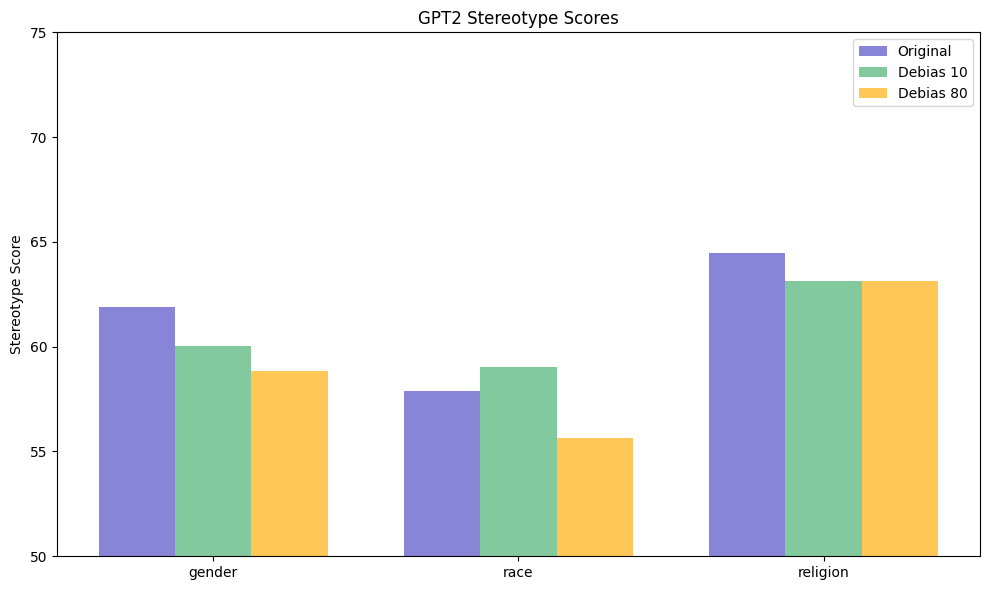

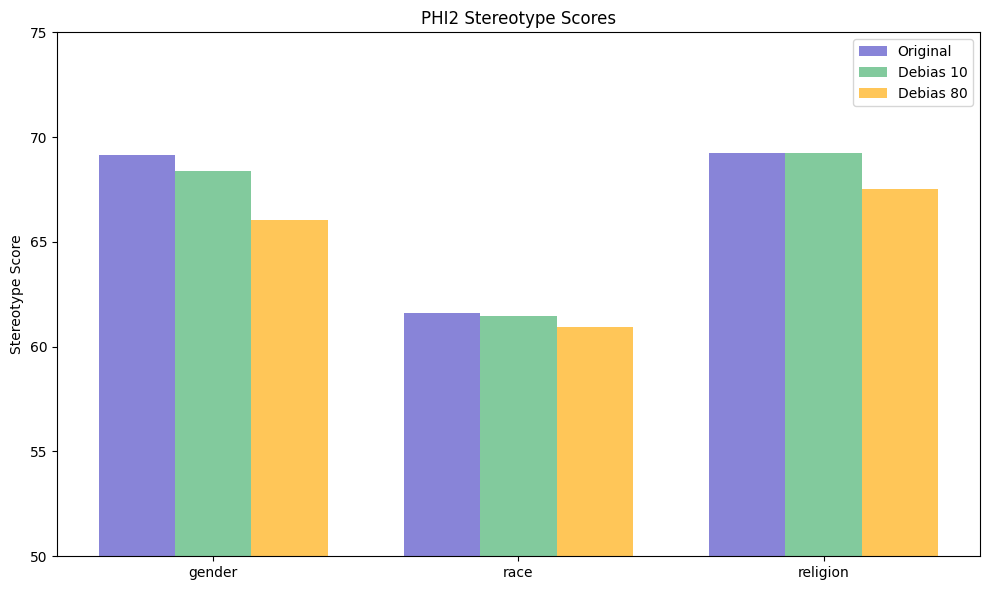

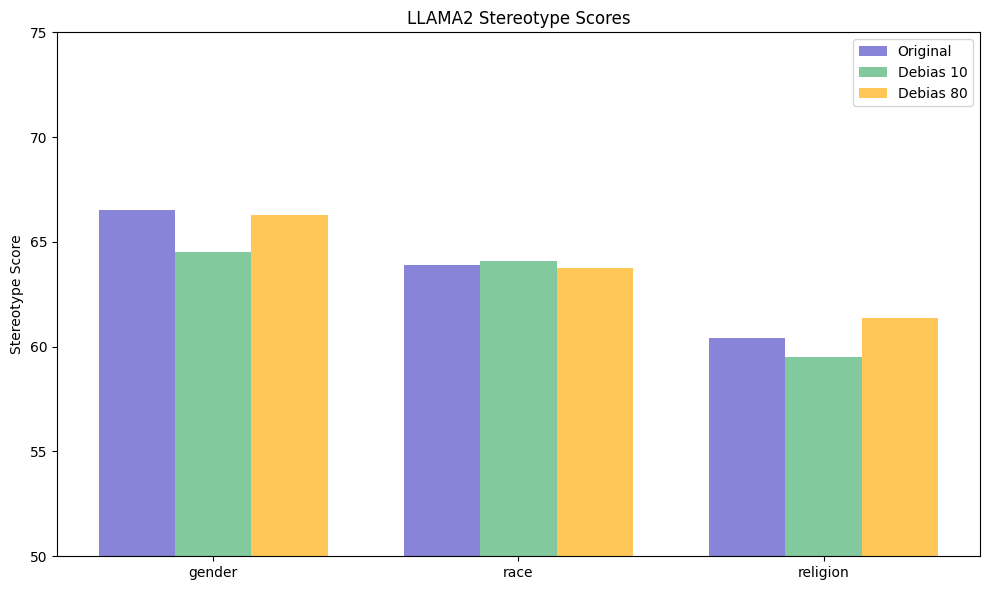

Charts have been generated and saved as PNG files.


In [24]:
# Generate charts for each model
models = ['gpt2', 'phi2', 'llama2']
for model in models:
    plot_model_chart(model, before_stereoset_results, stereoset_results_10, stereoset_results_80)

print("Charts have been generated and saved as PNG files.")

# CrowS-Pairs scores

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_chart(model_name, data_original, data_10, data_80):
    categories = ['gender', 'race-color', 'religion']
    original_scores = [data_original[model_name][cat]['Stereotype score'] for cat in categories]
    debias_10_scores = [data_10[model_name][cat]['Stereotype score'] for cat in categories]
    debias_80_scores = [data_80[model_name][cat]['Stereotype score'] for cat in categories]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width, original_scores, width, label='Original', color='#8884d8')
    rects2 = ax.bar(x, debias_10_scores, width, label='Debias 10', color='#82ca9d')
    rects3 = ax.bar(x + width, debias_80_scores, width, label='Debias 80', color='#ffc658')

    ax.set_ylabel('Stereotype Score')
    ax.set_title(f'{model_name.upper()} CrowS-Pairs Stereotype Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    ax.set_ylim(30, 90)  # Adjust y-axis range to fit the data

    plt.tight_layout()
    plt.savefig(f'media/inlp/{model_name}_crows_stereotype_scores.png')
    # Show the plot
    plt.show()

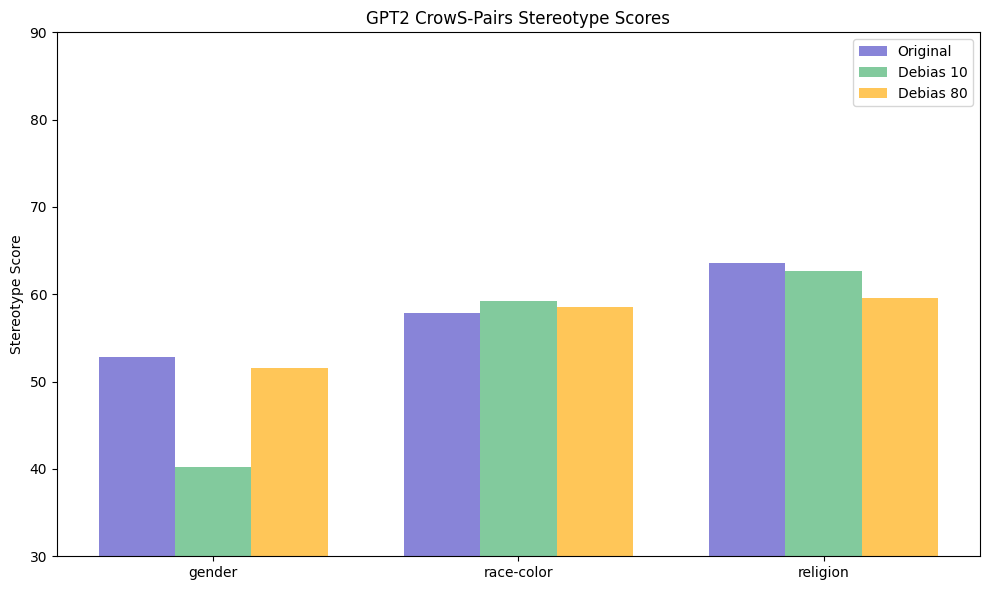

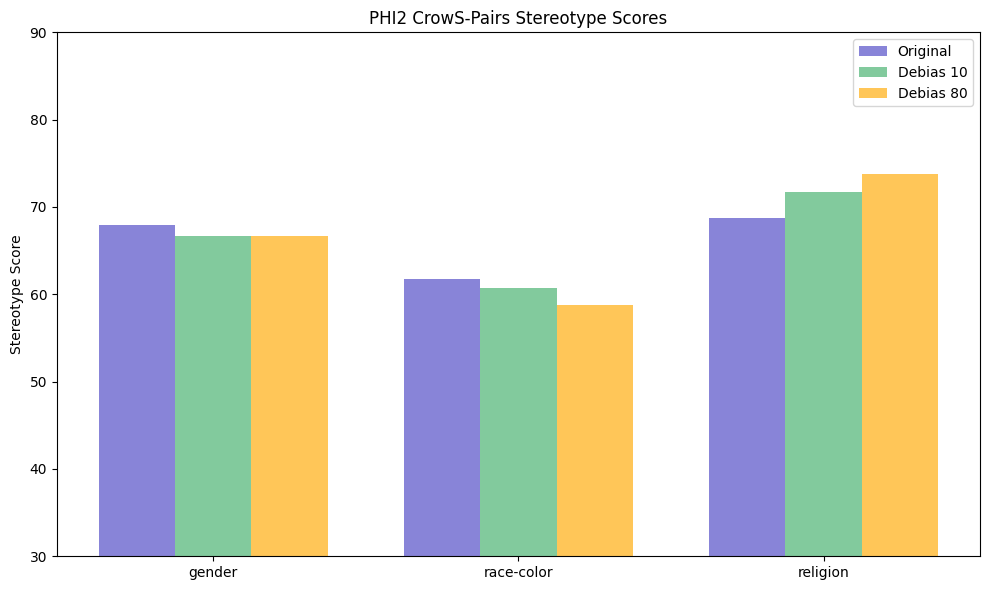

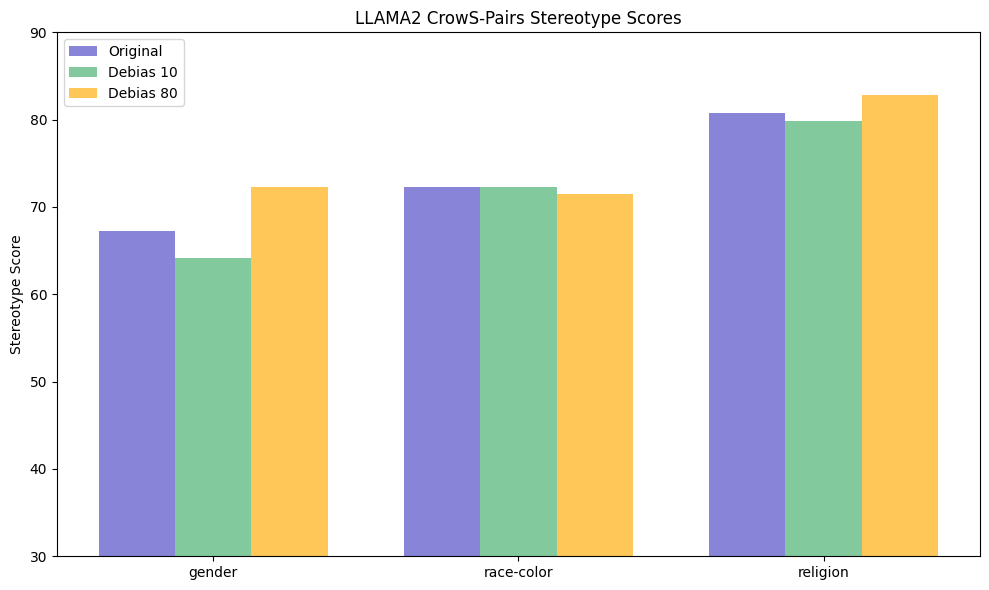

CrowS-Pairs charts have been generated and saved as PNG files.


In [27]:
# Generate charts for each model
models = ['gpt2', 'phi2', 'llama2']
for model in models:
    plot_model_chart(model, before_crows_results, crows_results_10, crows_results_80)

print("CrowS-Pairs charts have been generated and saved as PNG files.")

# Overall radar chart

In [42]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def radar_chart(model, stereoset_orig, stereoset_10, stereoset_80, crows_orig, crows_10, crows_80):
    categories = ['StereoSet Gender', 'StereoSet Race', 'StereoSet Religion',
                  'CrowS Gender', 'CrowS Race', 'CrowS Religion']
    
    values_orig = [stereoset_orig[model]['gender']['SS Score'], 
                   stereoset_orig[model]['race']['SS Score'], 
                   stereoset_orig[model]['religion']['SS Score'],
                   crows_orig[model]['gender']['Stereotype score'], 
                   crows_orig[model]['race-color']['Stereotype score'], 
                   crows_orig[model]['religion']['Stereotype score']]
    
    values_10 = [stereoset_10[model]['gender']['SS Score'], 
                 stereoset_10[model]['race']['SS Score'], 
                 stereoset_10[model]['religion']['SS Score'],
                 crows_10[model]['gender']['Stereotype score'], 
                 crows_10[model]['race-color']['Stereotype score'], 
                 crows_10[model]['religion']['Stereotype score']]
    
    values_80 = [stereoset_80[model]['gender']['SS Score'], 
                 stereoset_80[model]['race']['SS Score'], 
                 stereoset_80[model]['religion']['SS Score'],
                 crows_80[model]['gender']['Stereotype score'], 
                 crows_80[model]['race-color']['Stereotype score'], 
                 crows_80[model]['religion']['Stereotype score']]

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    values_orig = np.concatenate((values_orig, [values_orig[0]]))
    values_10 = np.concatenate((values_10, [values_10[0]]))
    values_80 = np.concatenate((values_80, [values_80[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values_orig, 'o-', linewidth=2, label='Original')
    ax.fill(angles, values_orig, alpha=0.25)
    ax.plot(angles, values_10, 'o-', linewidth=2, label='10 Classifiers')
    ax.fill(angles, values_10, alpha=0.25)
    ax.plot(angles, values_80, 'o-', linewidth=2, label='80 Classifiers')
    ax.fill(angles, values_80, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180/np.pi, categories)
    ax.set_ylim(30, 90)
    ax.set_title(f'{model.upper()} - StereoSet and CrowS-Pairs Stereotype Scores')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.tight_layout()
    plt.savefig(f'media/inlp/{model}_combined_radar_chart.png')
    # Show the plot
    plt.show()

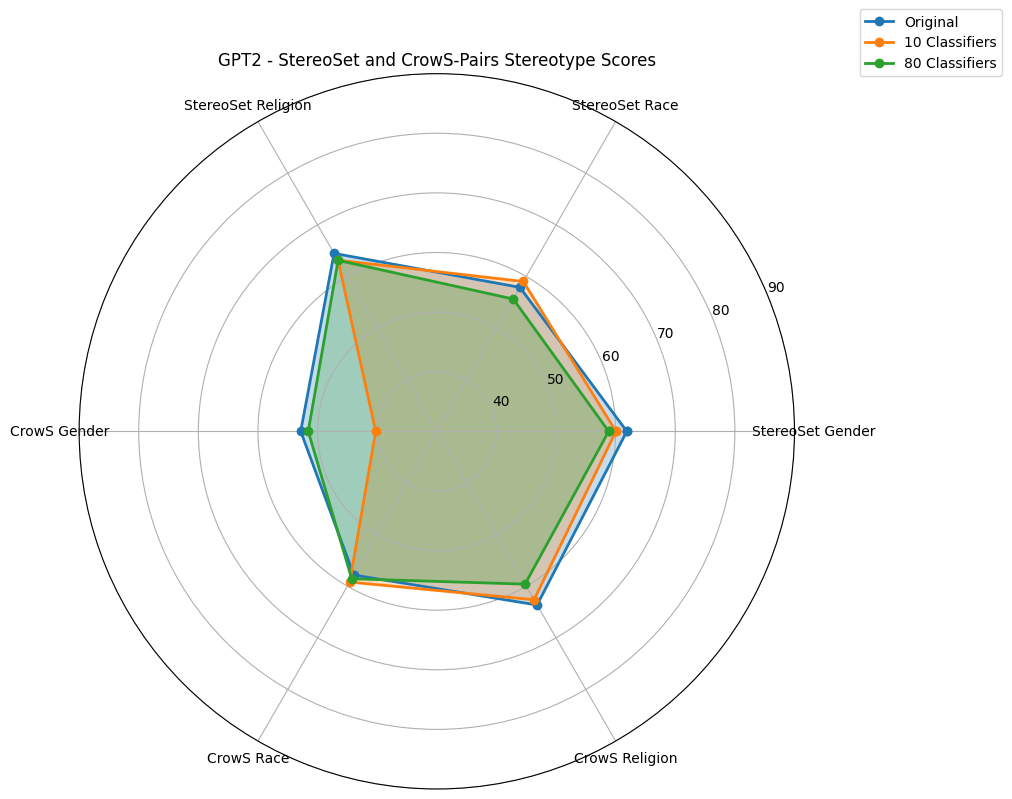

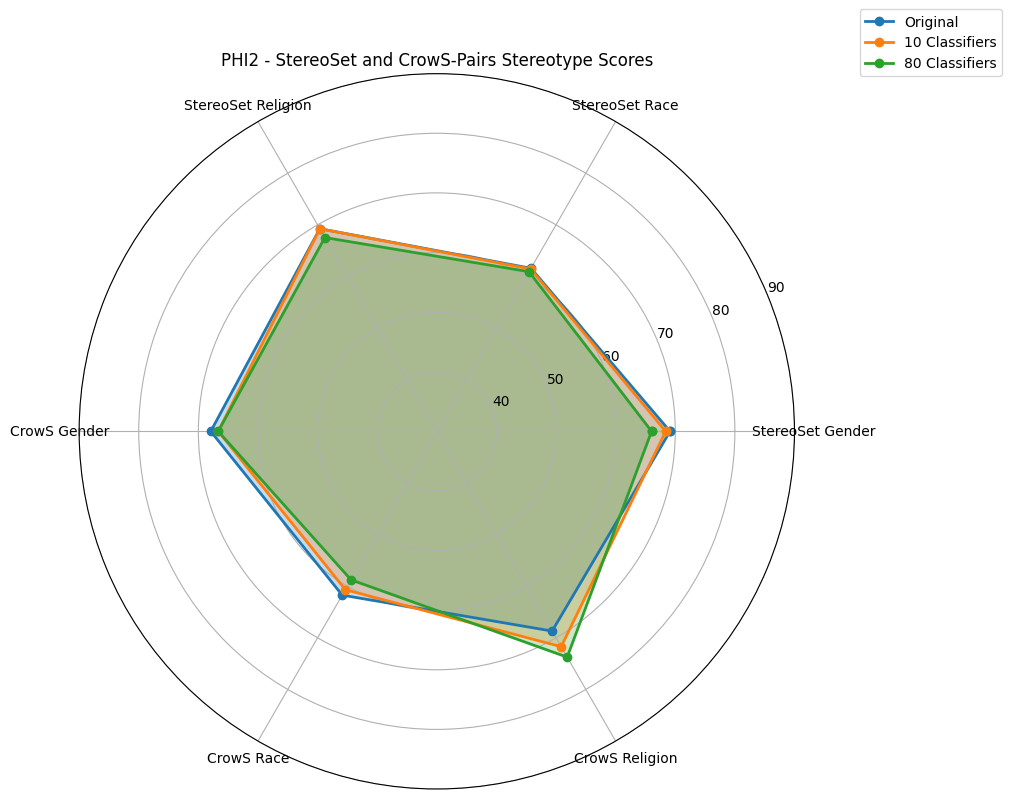

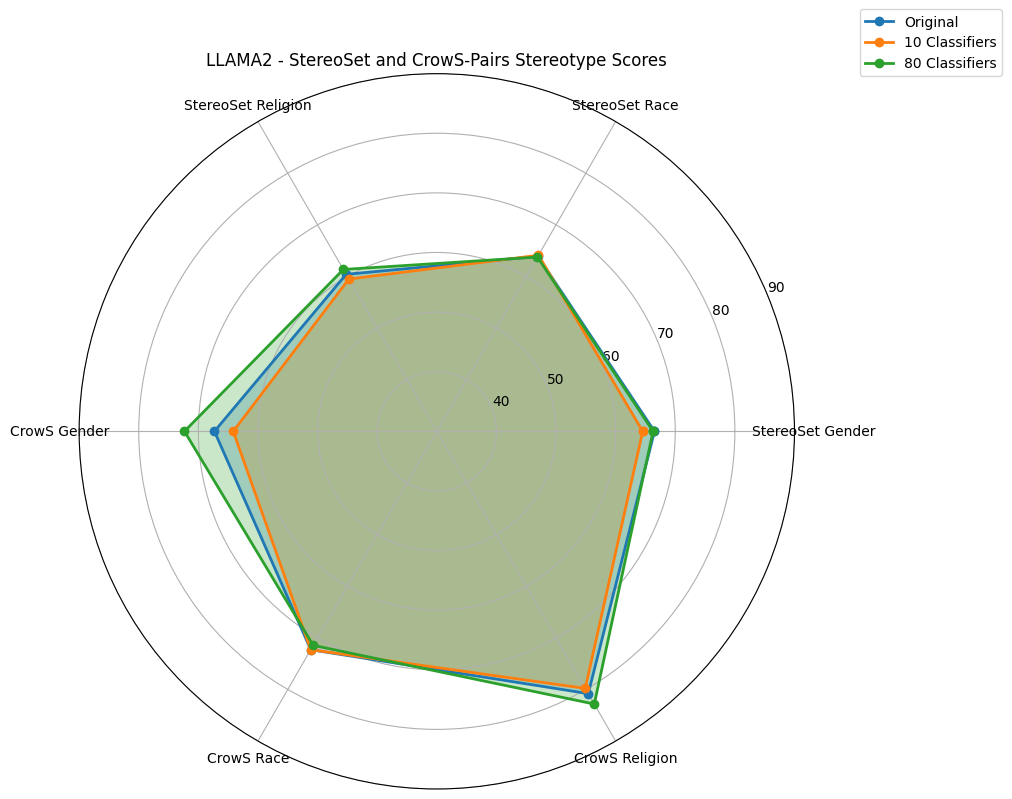

Combined radar charts have been generated and saved as PNG files.


In [43]:
# Generate charts for each model
models = ['gpt2', 'phi2', 'llama2']
for model in models:
    radar_chart(model, before_stereoset_results, stereoset_results_10, stereoset_results_80, before_crows_results, crows_results_10, crows_results_80)

print("Combined radar charts have been generated and saved as PNG files.")